# Homework 3: Conditioning and Stability

(Note that in this homework we use $\epsilon_m$ where the textbook uses $\epsilon_{\text{machine}}$ to save some keystrokes.)

In [1]:
import Pkg; Pkg.add("Plots");
using LinearAlgebra; using Plots; default(fmt=:png);

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


**1 (T&B 12.3).** Consider two classes of random matrices.  The first class has entries that are independent samples from the real normal distribution with mean zero and standard distribution $m^{-1/2}$. (Note that julia's `randn` produces matrices like this, but the entries have standard distribution $1$.)  The second class of matrices are the same as the first but upper triangular.

**(a) [4%]** For the first class of matrices for $m = {8, 16, 32, \dots, 1024}$, create 10 random matrices.  Create four scatter plots:

1. A scatter plot of all of the eigenvalues of all the matrices in the complex plane on top of each other.

2. A scatter plot of the spectral radius $\rho(A)$ of all the matrices, separated so that the trend in $m$ can be seen.

3. A scatter plot of the 2-norms of all the matrices, separated so that the trend in $m$ can be seen.

4. A scatter plot of $\sigma_m$ of all the matrices, separated so that the trend in $m$ can be seen.

In the next question you will estimate any trends that may be present, so scale your plots appropriately.

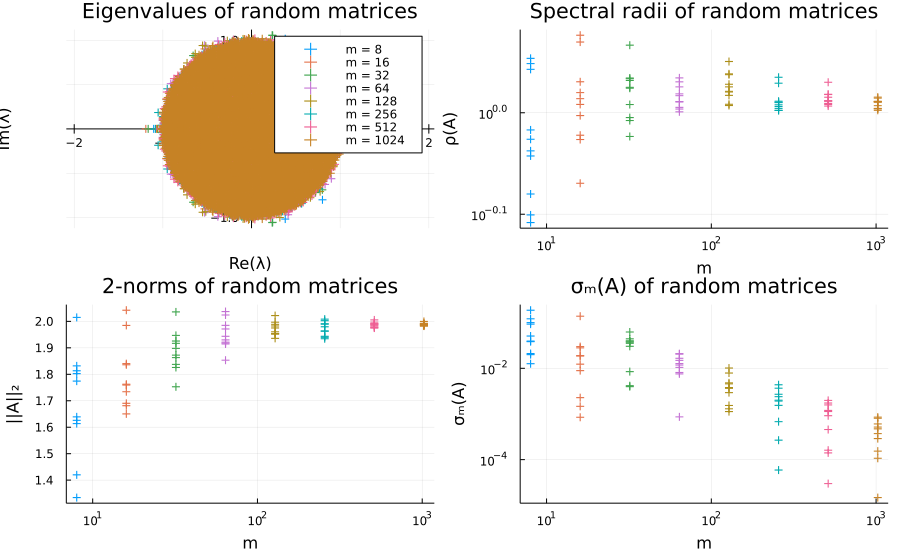

In [2]:
random_matrix(m) = randn(m,m)/sqrt(m)
function four_plots(class, name, complex=true)
    n_samples = 10
    p = if (complex)
            plot(fmt = :png
                , aspect_ratio = :equal
                , framestyle = :origin
                , xlabel = "Re(λ)"
                , ylabel = "Im(λ)"
                , title = "Eigenvalues of $name"
                )
        else
            plot(fmt = :png
            , xlabel = "m"
            , ylabel = "λ"
            , title = "Eigenvalues of $name"
            , legend = false
            , xscale = :log10
            )
        end
    r = plot(fmt = :png
        , xlabel = "m"
        , ylabel = "ρ(A)"
        , title = "Spectral radii of $name"
        , legend = false
        , yscale = :log10
        , xscale = :log10
        )
    n = plot(fmt = :png
        , xlabel = "m"
        , ylabel = "||A||₂"
        , title = "2-norms of $name"
        , legend = false
        , xscale = :log10
    )
    s = plot(fmt = :png
        , xlabel = "m"
        , ylabel = "σₘ(A)"
        , title = "σₘ(A) of $name"
        , xscale = :log10
        , yscale = :log10
        , legend = false
    )
    for m in 2 .^ (3:10)
        eigs = zeros(Complex{Float64}, m, n_samples)
        rads = zeros(n_samples)
        norms = zeros(n_samples)
        smins = zeros(n_samples)

        for k in 1:n_samples
            A = class(m)
            eigs[:,k] = eigvals(A)
            rads[k] = maximum(abs.(eigs[:,k]))
            norms[k] = opnorm(A, 2)
            smins[k] = svd(A).S[m]
        end
        lambdas = reshape(eigs, m * n_samples)
        if (complex)
            plot!(p, real.(lambdas), imag.(lambdas)
                , st = :scatter
                , m = :+
                , label = "m = $m"
                )
        else
            plot!(p, m * ones(n_samples), real.(lambdas)
                , st = :scatter
                , m = :+
                , label = "m = $m"
                )
        end
        plot!(r, m * ones(n_samples), rads
            , st = :scatter
            , m = :+
            , label = false
            )
        plot!(n, m * ones(n_samples), norms
            , st = :scatter
            , m = :+
            , label = false
            )
        plot!(s, m * ones(n_samples), smins
            , st = :scatter
            , m = :+
            , label = "m = $m"
            )
    end
    return plot(p, r, n, s, layout=(2,2), size=(900,550))
end
four_plots(random_matrix, "random matrices")

**(b) [3%]** Look at your plots from part (a) and estimate the trends of $\rho(A)$, $\|A\|_2$, and $\sigma_m(A)$. (If a value is convergening to a constant, what constant does it look like it's converging to?  If it is increasing or decreasing, is there a simple function of $m$ that it is behaving like?)

- $\rho(A) \to 1$

- $\|A\|_2 \to 2$

- $\sigma_m(A) \to m^{-1}$

**(c) [4%]** Create four similar plots for the class of random upper triangular matrices described.  For the scatter plot of the eigenvalues, the eigenvalues will all be real, so do not plot them in the complex plane.  Instead, create a plot like your other three with the values separated by $m$ so that you can see the trend.

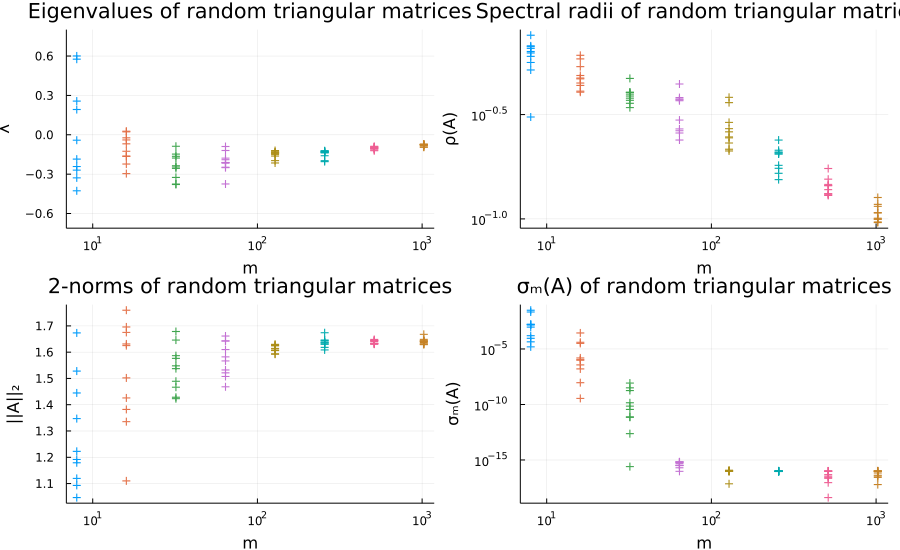

In [3]:
random_triangular_matrix(m) = triu(random_matrix(m))
four_plots(random_triangular_matrix, "random triangular matrices", false)

**(d) [4%]** As in part (b), estimate the trends that you see in part (c). (If any of the values fall below $\epsilon_m$, see if you can estimate the trend from the data before that happens.)

- $\rho(A) \to m^{-1/2}$
- $\|A\|_2 \to \approx 1.64$
- $\sigma_m(A) \to e^{-m}$

**2 (T&B 13.3).** Consider the polynomial $p(x) = (x-2)^9 = x^9 - 18 x^8 + 144 x^7 - 672 x^6 + 2016x^5 - 4032 x^4 + 5376 x^3 - 4608 x^2 + 2304 x - 512.$

**(a) [3%]** Plot $p(x)$ on the points `x = 1.930:0.001:2.070`, evaluating $p$ via its coefficients $1$, $-18$, $\dots$.

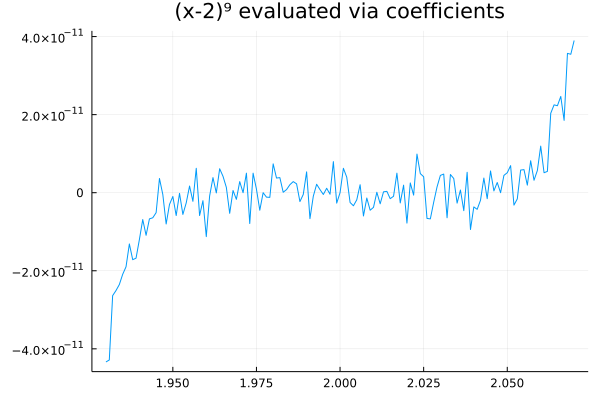

In [4]:
x = collect(1.930:0.001:2.070)
coeffs = [1, -18, 144, -672, 2016, -4032, 5376, -4608, 2304, -512]
y = zeros(size(x))
for c in coeffs
    y .*= x
    y .+= c
end
plot(x, y, label=false, title = "(x-2)⁹ evaluated via coefficients")

**(b) [3%]** Produce the same plot again, now evaluating $p$ via the expression $(x - 2)^9$.

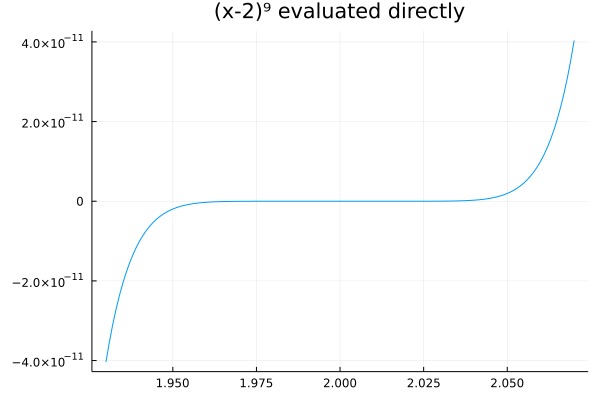

In [5]:
x = collect(1.930:0.001:2.070)
y = (x .- 2) .^ 9
plot(x, y, label=false, title = "(x-2)⁹ evaluated directly")

**3 (T&B 14.2).** 

**(a) [6%]** Show that $(1 + O(\epsilon_m))(1 + O(\epsilon_m)) = 1 + O(\epsilon_m).$  
The precise meaning of this statement is that if $f$ is a function satisfying
$f(\epsilon_m) = (1 + O(\epsilon_m))(1 + O(\epsilon_m))$
as $\epsilon_m \to 0$,
then $f$ also satisfies $f(\epsilon_m) = 1 + O(\epsilon_m)$ as $\epsilon_m \to 0.$

If $f(\epsilon_m) = (1 + O(\epsilon_m))(1 + O(\epsilon_m))$, then there exist $g = O(\epsilon_m)$ and $h = O(\epsilon_m)$ such that
$f(\epsilon_m) = (1 + g(\epsilon_m))(1 + h(\epsilon_m))$.

Expanding the right hand side, this says that
$$
f(\epsilon_m) = 1 + \underbrace{g(\epsilon_m) + h(\epsilon_m) + g(\epsilon_m)h(\epsilon_m)}_{r(\epsilon_m)}.
$$
We must show that $r = O(\epsilon_m)$.

By definition, there must exist $C_g$ and $\epsilon_g$ such that
$$
|g(\epsilon_m)| \leq C_g \epsilon_m, \quad\text{for all } \epsilon_m \leq \epsilon_g,
$$
and $C_h$ and $\epsilon_h$ such that
$$
|h(\epsilon_m)| \leq C_h \epsilon_m, \quad\text{for all } \epsilon_m \leq \epsilon_h.
$$
Suppose $\epsilon_m \leq \min\{\epsilon_g,\epsilon_h,1\}$: then
$$
\begin{aligned}
|r(\epsilon_m)| &= |g(\epsilon_m) + h(\epsilon_m) + g(\epsilon_m)h(\epsilon_m)| \\
&\leq |g(\epsilon_m)| + |h(\epsilon_m)| + |g(\epsilon_m)||h(\epsilon_m)| & \text{(triangle inequality)} \\
&\leq C_g \epsilon_m + C_h \epsilon_m + C_g C_h \epsilon_m^2 & \text{(assumptions on }g\text{ and }h\text{ and }\epsilon_m\text{)} \\
&\leq (C_g + C_h + C_g C_h) \epsilon_m & (\epsilon_m \leq 1).
\end{aligned}
$$
This shows that $r(\epsilon_m) = O(\epsilon_m)$ with constant $C = C_g + C_h + C_gC_h$ and radius $\epsilon_m \leq
\min\{\epsilon_g, \epsilon_h, 1\}.$

**(b) [6%]** Show that $(1 + O(\epsilon_m))^{-1} = 1 + O(\epsilon_m).$

If $f(\epsilon_m) = (1 + O(\epsilon_m))^{-1}$, then there exists $g = O(\epsilon_m)$ such that
$f(\epsilon_m) = (1 + g(\epsilon_m))^{-1}$.  We must show that $1 - f(\epsilon_m) = O(\epsilon_m)$.

By definition, there are $C_g$ and $\epsilon_g$ such

$$|g(\epsilon_m)| \leq C_g \epsilon_m, \quad, \epsilon_m \leq \epsilon_g.$$

Suppose $\epsilon_m \leq \min\{\epsilon_g, 1 / (2 C_g) \}$.  This implies

$$|1 + g(\epsilon_m)| \geq 1 - |g(\epsilon_m)| \geq 1 - C_g \epsilon_m \geq 1 - 1/2 = 1/2.$$

Therefore $|f(\epsilon_m)| = |1 + g(\epsilon_m)|^{-1} \leq 2.$

Now take the relationship $f = 1/(1 + g)$ and multiply both sides by $(1 + g)$ to see $f(1 + g) = 1$, and thus
$1 - f = fg$.  Taking the absolute value of both sides, we see

$$
|1 - f(\epsilon_m)| = |f(\epsilon_m)||g(\epsilon_m)| \leq 2 C_g \epsilon_m.
$$

This shows that $1 - f(\epsilon_m) = O(\epsilon_m)$ with constant $C = 2 C_g$ and radius $\min\{\epsilon_g, 1 / (2C_g)\}$.

**4.** When analyzing a computation that is the result of a large numbers of floating point operations, we often end up with expressions like

$$\hat{x} = x(1 + \delta_1)(1 + \delta_2)\cdots(1 + \delta_n),$$

where $x$ is the exact value and there have been $n$ relative errors $\delta_1, \dots, \delta_n$, each with magnitude $|\delta_i| \leq \epsilon_m$. An upperbound on the error is

$$\frac{|x - \hat{x}|}{|x|} \leq \underbrace{(1 + \epsilon_m)^n - 1}_{e_n(\epsilon_m)}.$$

**(a) [6%]** We could prove that the quantity $e_n(\epsilon_m)$ is $O(\epsilon_m)$, but we can do one better.  Show that $e_n(\epsilon_m) = n \epsilon_m + O(\epsilon_m^2).$

We use the binomial expansion,

$$
(1 + \epsilon_m)^n = \sum_{k=0}^n \binom{n}{k} \epsilon_m^k = 1 + n\epsilon_m + \sum_{k=2}^n \binom{n}{k} \epsilon_m^k.
$$

Therefore

$$
e_n(\epsilon_m) = (1 + \epsilon_m)^n - 1 = n \epsilon_m + \underbrace{\sum_{k=2}^n \binom{n}{k} \epsilon_m^k}_{r(\epsilon_m)}.
$$
We just have to show that $r(\epsilon_m) = O(\epsilon_m^2)$.
If $\epsilon_m < 1$, then  $\epsilon_m^k \leq \epsilon_m^2$ for all $k \geq 2$, and
$\sum_{k=2}^n \binom{n}{k}$ = 2^n - 1 - n$, so

$$r(\epsilon_m) = \sum_{k=2}^n \binom{n}{k} \epsilon_m^k \leq
\epsilon_m^2 \sum_{k=2}^n \binom{n}{k} = \epsilon_m^2 (2^n - 1 - n).
$$

Therefore $r(\epsilon_m) = O(\epsilon_m^2)$ with constant $C = 2^n - 1 - n$ and radius $\epsilon_m \leq 1.$

**(b) [6%]** The quantity $e_n(\epsilon_m)$ is hard to work with, and the asymptotic approximation $n\epsilon_m$ from part (a) is not an upper bound.

It turns out that an upper bound of $e_n(\epsilon_m)$ can be defined as

$$
\gamma_n(\epsilon_m) = \frac{n\epsilon_m}{1 - n\epsilon_m},$$

which is a good upper bound as long as $n \epsilon_m \ll 1.$

Prove that $\gamma_n(\epsilon_m) \geq e_n(\epsilon_m)$ whenever $n\epsilon_m < 1.$

$$
\frac{e_n(\epsilon_m) + 1}{\gamma_n(\epsilon_m) + 1}
= 
\frac{(1 + \epsilon_m)^n}{\frac{n\epsilon_m}{1 - n \epsilon_m} + \frac{1 - n \epsilon_m}{1 - n \epsilon_m}}
= 
\frac{(1 + \epsilon_m)^n}{\frac{1}{1 - n \epsilon_m}}
= (1 + \epsilon_m)^n(1 - n \epsilon_m).
$$
This ratio is $1$ at $\epsilon_m = 0$.
Evaluating the derivative of the ratio with respect to $\epsilon_m$  at any $\epsilon_m \geq 0$ we get
$$
\partial_{\epsilon_m}\left\{(1 + \epsilon_m)^n(1 - n \epsilon_m)\right\} =
n(1 + \epsilon_m)^{n-1}(1 - n \epsilon_m) - n \epsilon_m (1 + \epsilon_m)^n
= n(1 + \epsilon_m)^{n-1}(1 - n \epsilon_m - \epsilon_m(1 + \epsilon_m))
= \underbrace{n(1 + \epsilon_m)^{n-1}}_{\geq 0}\underbrace{(1 - (n+1) \epsilon_m - \epsilon_m^2)}_{\leq 0} \leq 0.
$$
Because the derivative is always negative we conclude
$$
\frac{e_n(\epsilon_m) + 1}{\gamma_n(\epsilon_m) + 1} \leq 1,
$$
which implies the desired bound.

**c [3%]** Create a plot showing $e_n$ and $\gamma_n$ for $\epsilon_m$ for 32-bit floating point numbers for $n = 0$ to 1 million.

**5 bonus points.** Determine a rational function

$$
\eta_n(\epsilon_m) = \frac{n \epsilon_m}{\alpha_n + \beta_n \epsilon_m},
$$
where $\alpha_n$ and $\beta_n$ can be any functions of $n$, such that

$$\eta_n(\epsilon_m) \geq e_n(\epsilon_m), \quad \text{ whenever }\alpha_n + \beta_n \epsilon_m < 1,$$

and such that $\eta_n(\epsilon_m) - e_n(\epsilon_m) = O(\epsilon_m^3)$, and add $\eta_n$ to your plot.

In [6]:
emach = Float64(eps(Float32))

1.1920928955078125e-7

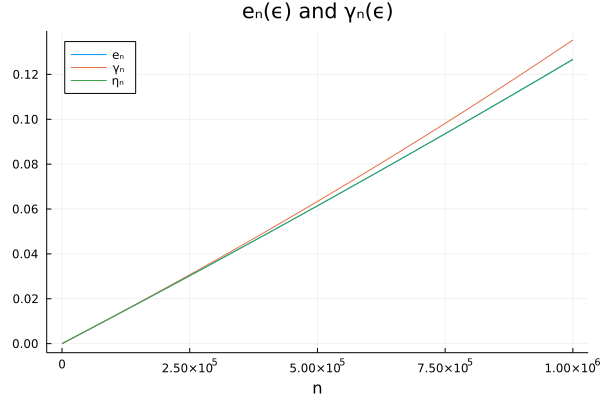

In [7]:
ns = LinRange(0,1000000,200)
e_n = [(1 + emach)^n - 1 for n in ns]
g_n = [(n * emach) / (1 - n*emach) for n in ns]
eta_n = [(n * emach) / (1 - (n-1)*emach/2) for n in ns]
plot(ns, [e_n g_n eta_n], label = ["eₙ" "γₙ" "ηₙ"], xlabel="n", title = "eₙ(ϵ) and γₙ(ϵ)", legend_position=:topleft)

**5 (T&B 15.2).** Consider an algorithm for the problem of computing the (full) SVD of a matrix.  The data for this problem is a matrix $A$, and the solution is three matrices $U$ (unitary), $\Sigma$ (diagonal), and $V$ (unitary) such that $A = U \Sigma V^*$.  (We are speaking here of explicit matrices $U$ and $V$, not implicit representations as products of reflectors.)

**(a) [3%]** Explain what it would mean for this algorithm to be backward stable.

It would mean that the computed matrices $U$, $\Sigma$, and $V$ are the SVD of some perturbed matrix $A + \delta A$ such that $\|\delta A\| / \|A\| = O(\epsilon_m).$

**(b) [5%]** In fact, for a simple reason, this algorithm cannot be backward stable.  Explain.

The rounding errors present in constructing $U$ and $V$ mean that they will not be exactly unitary matrices in general, so they cannot be part of the SVD of some perturbed matrix.  Looking just at $U$, it is constructed as an element in an $m^2$-dimensional space.  The set of unitary matrix is akin to an $\frac{1}{2}n(n-1)$-dimensional subset of that space, and so the numerical errors, which appear random, will not perturb
a point in that lower dimensional set and stay in that lower dimensional set.

**(c) [5%]** Fortunately, the standard algorithms for computing the SVD are stable.  Explain what stability means for such an algorithm.

Stability means there is a perturbed matrix $\tilde{A} = A + \delta A$ with $\|\delta A\| / \|A\| = O(\epsilon_m)$, which has the SVD $\tilde{U} \tilde{\Sigma} \tilde{V}^* = \tilde{A}$, such that

$$
\max\{\|U - \tilde{U}\|,\|V - \tilde{V}\|,\|\Sigma - \tilde{\Sigma}\| \} /
\max\{\|\tilde{U}\|,  \|\tilde{V}\|, \|\tilde{\Sigma}\| \} = O(\epsilon_m).
$$

Because the matrices are unitary, $\|\tilde{U}\|$ and $\|\tilde{V}\|$ can be dropped from these expressions.

**6 (Inspired by T&B 16.1).** Let $Q$ and $A$ be $n \times n$ floating point matrices (meaning $Q = \mathrm{fl}(Q)$ and $A = \mathrm{fl}(A)$), and suppose $Q$ is unitary.  Define $f(A) = QA$ in exact arithmetic, and let $\tilde{f}(Q) = \mathrm{fl}(QA)$ computed in the straightforward way.

**(a) [7%]** Show that $\tilde{f}$ is accurate in the Frobenius norm,

$$\frac{\|\tilde{f}(A) - f(A)\|_F}{\|f(A)\|_F} = O(\epsilon_m).$$

You may use the backward stability of the inner product without proof.

Let $b_{ij} = q_i^* a_j$ and $\hat{b}_{ij} = \mathrm{fl}(q_i^* a_j)$, where $q_i^*$ is row $i$ of $Q$ and $a_j$ is column $j$ of $A$.

By the backward stability of the inner product, $\hat{b}_{ij} = q_i^*(a_j + \delta a_j)$, where $|(\delta a_j)_i| / |a_{ij}| = O(\epsilon_m).$  Let $\delta_ij = \hat{b}_{ij} - b_{ij}$: we have

$$|\delta_{ij}| = |q_i^* \delta a_j| \leq \underbrace{\|q_i\|_2}_{1} \|\delta a_j\|_2 \leq \epsilon_m \|a_j\|_2.$$

Therefore $\delta_{ij} = O(\|a_j\|_2 \epsilon_m).$  Summing the squares over these entries,

$$
\|\tilde{f}(A) - f(A)\|_F^2 = \sum_{i,j} |\delta_{ij}|^2 = \sum_{ij} O(\|a_j\|_2^2 \epsilon_m^2)
=
\|A\|_F^2 n O(\epsilon_m^2) = \|A\|_F^2 O(\epsilon_m^2).$$

**(b) [7%]** Use your answer from part (a) to show that $\tilde{f}$ is backward stable.

_Hint._ Use $Q^*(\tilde{f}(A) - f(A))$.

First we can show that $\tilde{f}(A) = Q(A + \delta A)$:

$$\tilde{f}(A) = f(A) + (\tilde{f}(A) - f(A)) = QA + QQ^*(\tilde{f}(A) - f(A)) = Q(A + \underbrace{Q^*(\tilde{f}(A) - f(A))}_{\delta A}).$$

Now we must show that the norm of $\delta A$ is properly bounded:

$$
\frac{\|\delta A\|_F}{\|A\|_F} = \frac{\|Q^* (\tilde{f}(A) - f(A))\|_F}{\|A\|_F} = \frac{\|\tilde{f}(A) - f(A)\|_F}{\|A\|_F} = O(\epsilon_m),
$$

where we have used that the Frobenius norm is preserved by unitary transformations.

**7 (T&B 18.2). [10%]** Social scientists depend on the technique of _regression_, in which a vector of observations of some quantity is approximated in the least squares sense by a linear combination of other vectors. The coefficients of the fit are then interpreted as representing, say, the effects on annual income of IQ, years of education, parents' years of education, and parents' income.

One might think that the more variables one included in such model, the more information one would obtain, but this is not always true.  Explain this phenomenon from the point of view of conditioning, making specific reference to the results of T&B Theorem 18.1.

> **T&B Theorem 18.1.** Let $b \in \mathbb{C}^m$ and $A \in \mathbb{C}^{m \times n}$ of full rank be fixed. The least squares problem $\min_x \|b - Ax\|$ has the following 2-norm relative condition numbers describing the sensitivities of $y$ and $x$ to perturbations in $b$ and $A$:
$$\begin{array}{c|c|c|}
 & y & x \\ \hline
b & \frac{1}{\cos \theta} & \frac{\kappa(A)}{\eta \cos \theta} \\ \hline
A & \frac{\kappa(A)}{\cos \theta} & \kappa(A) + \frac{\kappa(A)^2\tan\theta}{\eta} \\ \hline
\end{array}.
$$
Here $\kappa(A) = \|A\|\|A^+\|$, $\theta = \cos^{-1} \frac{\|y\|}{\|b\|}$, $y$ is the projection of $b$
onto the range of $A$, and $\eta = \|A\|\,\|x\| / \|y\|.$
The results in the first row are exact, being attained for certain perturbations $\delta b$, and the results in the second row are upper bounds.

In the regression problem discussed, adding explanatory variables is like adding columns to the matrix $A$.  On the one hand, adding columns expands the range space of $A$, so that is likely to increase the cosine between $b$ and its projection into $\mathrm{range}(A)$, which reduces the sensitivity of $y$ and $x$ to changes in $b$.  But adding additional variables that are similar to each other is likely to increase the condition number of $A$, which increases the sensitivity of $y$ to changes in $A$ and increases the sensitivity of $x$ with respect to changes in $b$ and changes in $A$.  So while the addition of explanatory variables will not decrease the total explanatory power of the model (which is represened by $\cos \theta$),
it can make it much less interpretable.

**8 (Based on Example from T&B Lecture 19).** Lecture 19 says that using modified Gram-Schmidt to solve the least squares problem _directly_ -- forming $\hat{Q}$ and $\hat{R}$ and computing $x \gets R \backslash Q^* b$ --
is unstable, but solving it _implicitly_ -- forming a reduced QR factorization $\tilde{Q}, \tilde{R}$ of the _augmented_ matrix
$[A | b]$, and computing $x \gets \tilde{R}_{1:n,1:n} \backslash \tilde{Q}_{1:n,n+1}$ --- is backward stable.

In this problem you will demonstrate this difference.

An implementation of modified Gram-Schmidt to compute a reduced QR factorization is provided.

In [8]:
function mgs(A)
    """
    Compute and return the QR factorization of `A` by Modified Gram-Schmidt procedure.

    # Arguments
    
    - `A`: m × n matrix (m ≥ n) to factor

    # Returns

    - `Q`: m × n matrix with orthonormal columns spanning range(A) 
    - `R`: n × n upper triangular matrix, coefficients of columns of `A` 
           in the basis of `Q`
    """
    _, n = size(A)
    Q = copy(A)
    R = zeros(eltype(A), n, n)
    for i in 1:n
        R[i,i] = norm(Q[:,i])
        Q[:,i] /= R[i,i]
        R[i,i+1:n] = Q[:,i]' * Q[:,i+1:n]
        Q[:,i+1:n] -= Q[:,[i]] * R[[i],i+1:n]
    end
    return Q, R
end

mgs (generic function with 1 method)

The function `generate_ls_problem` creates a least squares problem instance for testing.  It takes as inputs the size of $A$, as well as the factors that control the relative errors of $x$ and $y = Pb$:

- The condition number $\kappa(A)$
- The angle $\theta$ of $b$ to $\mathrm{range}(A)$ 
- The ratio $\eta$ of $\|x\|$ to $\|y\|$

In [9]:
function generate_ls_problem(m, n, κ, θ, η)
    """
    Create a random least squares problem with the desired conditioning factors
    
    # Arguments
    
    - `m`, `n`: the dimensions of the least squares problem
    - `κ`: the 2-norm condition number of `A`
    - `θ`: the angle of `b` to range(A)
    - `η`: the ratio of ||x|| to ||y||
    
    # Returns
    
    - `A`: the system matrix
    - `x`: the solution vector
    - `r`: the residual vector
    
    Compute `y = A*x` and `b = y + r` to construct the right hand side of the least squares problem
    """
    @assert(m >= n)
    @assert(κ >= 1.0)
    @assert(η >= 1.0 && κ >= η)
    
    # generate a random square matrix with the desired
    # condition number
    σ = LinRange(1.0, 1.0 / κ, n)
    U = qr(randn(n,n)).Q
    V = qr(randn(n,n)).Q
    A = zeros(m, n)
    A[1:n,1:n] = U * diagm(σ) * V'
    
    # create a solution vector with norm η cos θ
    x = zeros(n)
    ϕ = 1 / η
    # spread the support of x out widely over the singular vectors
    # pairing large and small singular values appropriately scaled
    # to guarantee ||x|| = η ||y||
    for i = 1:div(n,2)
        s = σ[i]
        t = σ[end-(i-1)]
        if (s >= ϕ && t <= ϕ)
            if s == t
                x[i] = 1.
                x[end-(i-1)] = 1.
            else
                c = (ϕ+t)*(ϕ-t)/(s+t)/(s-t)
                x[i] = sqrt(c)
                x[end-(i-1)] = sqrt(1 - c)
            end
        end
    end
    x = V * x
    # normalize x so that ||y|| = 1
    xnorm = norm(x)
    x *= η / xnorm
    
    # set up a right hand side where ||b|| = 1 and ||y = Pb|| = cos θ
    c = cos(θ)
    s = sin(θ)
    # rescale x so ||y|| = cos θ
    x *= c
    r = zeros(m)
    # put sin θ in the last component (this will be the residual r)
    r[end] = s
    
    # randomly rotate the columns
    Q = qr(randn(m,n)).Q
    A = Q'*A
    r = Q'*r
    
    return A, x, r
end

generate_ls_problem (generic function with 1 method)

**(a) [6%]** Implement a function that solves the least squares problem directly as described above.

In [10]:
function solve_ls_mgs_direct(A, b)
    """
    Solve minₓ ||Ax - b||₂ by direct application of modified Gram-Schmidt
    
    # Arguments
    
    - `A`: system matrix
    - `b`: right-hand side
    
    # Returns
    
    - `x`: the computed solution vector
    - `y`: the projection `Pb` of `b` onto the range of `A`
    """
    ### BEGIN SOLUTION
    Q, R = mgs(A)
    ŷ = Q' * b
    x = R \ ŷ
    y = Q * ŷ
    ### END SOLUTION
    return x, y
end

solve_ls_mgs_direct (generic function with 1 method)

In [11]:
# Test solve_ls_mgs_direct on a random well-conditioned problem

m = 100; n = 15; κ = 10; θ = π / 20; η = κ / 2;
A, x, r = generate_ls_problem(m, n, κ, θ, η)
y = A * x
b = r + y
x_dir, y_dir = solve_ls_mgs_direct(A, b)
x_rel_err = norm(x_dir - x) / norm(x)
y_rel_err = norm(y_dir - y) / norm(y)

display("Solution by direct MGS: (x, y) relative errors: ($x_rel_err, $y_rel_err)")
@assert(x_rel_err < 100 * eps())
@assert(y_rel_err < 100 * eps())

"Solution by direct MGS: (x, y) relative errors: (3.1176579533694927e-16, 5.247981361049061e-16)"

In [12]:
# Test solve_ls_mgs_direct on a moderately-conditioned problem with η = κ: stability is not a concern yet

m = 100; n = 15; κ = 1.e6; θ = π / 20; η = κ;
A, x, r = generate_ls_problem(m, n, κ, θ, η)
y = A * x
b = r + y
x_dir, y_dir = solve_ls_mgs_direct(A, b)
x_rel_err = norm(x_dir - x) / norm(x)
y_rel_err = norm(y_dir - y) / norm(y)

display("Solution by direct MGS: (x, y) relative errors: ($x_rel_err, $y_rel_err)")
@assert(x_rel_err < 100 * κ * eps())
@assert(y_rel_err < 100 * κ * eps())

"Solution by direct MGS: (x, y) relative errors: (4.753883218998952e-12, 8.644706891961821e-11)"

In [13]:
# Test solve_ls_mgs_direct on an ill-conditioned problem with η = 2, and a small θ: should be unstable

m = 100; n = 15; κ = 1.e10; θ = 1.e-6; η = 2;
A, x, r = generate_ls_problem(m, n, κ, θ, η)
y = A * x
b = r + y
x_dir, y_dir = solve_ls_mgs_direct(A, b)
x_rel_err = norm(x_dir - x) / norm(x)
y_rel_err = norm(y_dir - y) / norm(y)

display("Solution by direct MGS: (x, y) relative errors: ($x_rel_err, $y_rel_err)")
@assert(x_rel_err > 1.0)
@assert(y_rel_err < 100 * κ * eps())

"Solution by direct MGS: (x, y) relative errors: (557.2004676555282, 1.1144008224242373e-7)"

**(b) [6%]** Now implement a function that solve the least squares problem implicitly as described above.

In [14]:
function solve_ls_mgs_implicit(A, b)
    """
    Solve minₓ ||Ax - b||₂ by implicit application of modified Gram-Schmidt to the augmented system [A|b]
    
    # Arguments
    
    - `A`: system matrix
    - `b`: right-hand side
    
    # Returns
    
    - `x`: the computed solution vector
    - `y`: the projection `Pb` of `b` onto the range of `A`
    """
    ### BEGIN SOLUTION
    m, n = size(A)
    Qaug, Raug = mgs([A b])
    R = Raug[1:n,1:n]
    Qb = Raug[1:n,n+1]
    x = R \ Qb;
    y = Qaug[:,1:n]* Qb
    ### END SOLUTION
    return x, y
end

solve_ls_mgs_implicit (generic function with 1 method)

In [15]:
# Test solve_ls_mgs_implicit on a random well-conditioned problem

m = 100; n = 15; κ = 10; θ = π / 20; η = κ / 2;
A, x, r = generate_ls_problem(m, n, κ, θ, η)
y = A * x
b = r + y
x_dir, y_dir = solve_ls_mgs_implicit(A, b)
x_rel_err = norm(x_dir - x) / norm(x)
y_rel_err = norm(y_dir - y) / norm(y)

display("Solution by implicit MGS: (x, y) relative errors: ($x_rel_err, $y_rel_err)")
@assert(x_rel_err < 100 * eps())
@assert(y_rel_err < 100 * eps())

"Solution by implicit MGS: (x, y) relative errors: (1.2717310869440501e-16, 3.849286041906456e-16)"

In [16]:
# Test solve_ls_mgs_implicit on a moderately-conditioned problem with η = κ: still stable

m = 100; n = 15; κ = 1.e6; θ = π / 20; η = κ;
A, x, r = generate_ls_problem(m, n, κ, θ, η)
y = A * x
b = r + y
x_dir, y_dir = solve_ls_mgs_implicit(A, b)
x_rel_err = norm(x_dir - x) / norm(x)
y_rel_err = norm(y_dir - y) / norm(y)

display("Solution by implicit MGS: (x, y) relative errors: ($x_rel_err, $y_rel_err)")
@assert(x_rel_err < 100 * κ * eps())
@assert(y_rel_err < 100 * κ * eps())

"Solution by implicit MGS: (x, y) relative errors: (1.1161864475280399e-12, 7.401093016132187e-11)"

In [17]:
# Test solve_ls_mgs_implicit on an ill-conditioned problem with η = 2, and a small θ: still stable
m = 100; n = 15; κ = 1.e10; θ = 1.e-6; η = 2;
A, x, r = generate_ls_problem(m, n, κ, θ, η)
y = A * x
b = r + y
x_dir, y_dir = solve_ls_mgs_implicit(A, b)
x_rel_err = norm(x_dir - x) / norm(x)
y_rel_err = norm(y_dir - y) / norm(y)

display("Solution by implicit MGS: (x, y) relative errors: ($x_rel_err, $y_rel_err)")
@assert(x_rel_err < 100 * m * n * κ * eps())
@assert(y_rel_err < 100 * κ * eps())

"Solution by implicit MGS: (x, y) relative errors: (6.95405099367616e-5, 1.3924160266282472e-14)"

**(c) [4%]** Create two plots, one for the relative $x$ error $\|\hat x - x\| / \|x\|$ and one for the relative $y$ error $\|\hat y - y \| / \|y\|$.  Generate 10 least squares problems for each of the condition numbers $\kappa(A) = 10^1, 10^2, \dots, 10^10$, with $\theta = 10^{-6}$ and $\eta = \sqrt{\kappa}$.
Solve each generated least squares problem directly and implicitly and record the $x$ and $y$ relative errors.
Plot the relative errors in the $x$ and $y$ plots as scatter plots.  Use $\kappa$ as the x-axis and the relative error as the y-axis.  Use logarithmic scales for both axes.  Make sure the difference between the direct and implicit data points is clearly labeled in your plots.

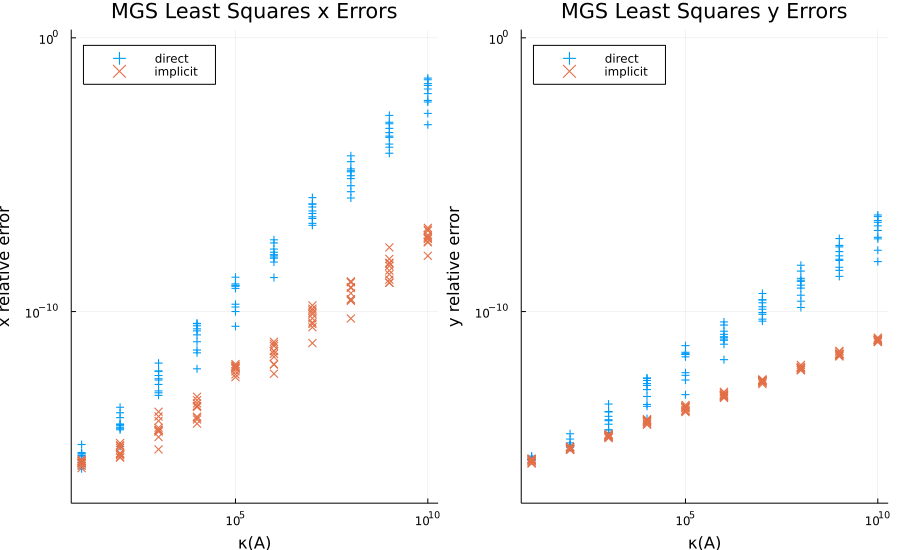

In [18]:
m = 100; n = 15; θ = 1.e-6;
n_samples = 10
x_err_plot = plot(ylabel="x relative error", title="MGS Least Squares x Errors")
y_err_plot = plot(ylabel="y relative error", title="MGS Least Squares y Errors")
x_rel_errs_dir = Float64[]
y_rel_errs_dir = Float64[]
x_rel_errs_imp = Float64[]
y_rel_errs_imp = Float64[]
κs = Float64[]
for κ in 10 .^ (1:10)
    for i in 1:n_samples
        A, x, r = generate_ls_problem(m, n, κ, θ, sqrt(κ))
        y = A * x
        b = r + y
        x_dir, y_dir = solve_ls_mgs_direct(A, b)
        x_aug, y_aug = solve_ls_mgs_implicit(A, b)
        push!(x_rel_errs_dir, norm(x - x_dir) / norm(x))
        push!(y_rel_errs_dir, norm(y - y_dir) / norm(y))
        push!(x_rel_errs_imp, norm(x - x_aug) / norm(x))
        push!(y_rel_errs_imp, norm(y - y_aug) / norm(y))
        push!(κs, κ)
    end
end
plot!(x_err_plot, κs, x_rel_errs_dir, st=:scatter, m=:+, label="direct")
plot!(x_err_plot, κs, x_rel_errs_imp, st=:scatter, m=:x, label="implicit")
plot!(y_err_plot, κs, y_rel_errs_dir, st=:scatter, m=:+, label="direct")
plot!(y_err_plot, κs, y_rel_errs_imp, st=:scatter, m=:x, label="implicit")
plot(x_err_plot, y_err_plot, layout=(1,2), size=(900,550)
    , legend=:topleft
    , ylim=(1.e-17,2)
    , xlabel="κ(A)"
    , scale=:log10
)